<a id="1"></a> <br>
## Import Libraries and the Data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools
import random
import os


2022-11-07 22:28:16.799032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 22:28:16.935963: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 22:28:17.391380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64
2022-11-07 22:28:17.391471: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [2]:
path = '../../dataset/bac/8combinations/'
file_name = 'indi_final_twitter_vader_sum'

df_test = pd.read_csv(path + file_name + '.csv')
# change the Positive, Negative, Neutral to the column before the last column

df_to_move = df_test[['Positive', 'Negative', 'Neutral']]
df_close = df_test[['close']]
df_new = df_test.drop(['Positive', 'Negative', 'Neutral', 'close'], axis=1)


#concate the three dfs
df_new = pd.concat([df_new, df_to_move], axis=1)
df = pd.concat([df_new, df_close], axis=1)
df



,date,open,low,high,volume,SMA_100,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,CUMLOGRET_1,Positive,Negative,Neutral,close
0,2010-01-04,15.240000,15.120000,15.750000,180845200.0,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,15.690000
1,2010-01-05,15.740000,15.700000,16.209999,209521300.0,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031988,1.0,0.0,0.0,16.200001
2,2010-01-06,16.209999,16.030001,16.540001,205257900.0,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043648,0.0,0.0,0.0,16.389999
3,2010-01-07,16.680000,16.510000,17.190001,320868400.0,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076064,1.0,1.0,0.0,16.930000
4,2010-01-08,16.980000,16.629999,17.100000,220104700.0,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067164,2.0,0.0,0.0,16.780001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,2016-12-23,22.510000,22.430000,22.650000,38093700.0,17.5793,20.514864,22.1860,23.857136,15.064781,0.623868,65.808561,0.865727,-0.170413,1.036140,0.364926,0.0,10.0,14.0,22.600000
1758,2016-12-27,22.709999,22.540001,22.740000,39891000.0,17.6606,20.864876,22.3015,23.738125,12.883659,0.607370,65.909217,0.813404,-0.178189,0.991593,0.365369,1.0,1.0,10.0,22.610001
1759,2016-12-28,22.620001,22.260000,22.670000,52141300.0,17.7334,21.302042,22.4035,23.504959,9.832914,0.466635,60.535947,0.740804,-0.200631,0.941435,0.352907,2.0,0.0,1.0,22.330000
1760,2016-12-29,22.330000,21.770000,22.389999,78979400.0,17.8021,21.494319,22.4475,23.400682,8.492542,0.265260,54.859419,0.649157,-0.233823,0.882979,0.338019,10.0,1.0,0.0,22.000000


In [3]:
df_BAC1 = df
df_BAC1.shape

(1762, 20)

In [4]:
# df_BAC1 = df_BAC[['todate','open','low','high','volume','close']]
df_BAC1 = df_BAC1.reset_index(drop=True)
#df_BAC1['todate'] = pd.to_datetime(df_BAC1['todate']) 
df_BAC1.set_index('date', inplace=True)             


In [5]:
df_BAC1.head()

,open,low,high,volume,SMA_100,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,CUMLOGRET_1,Positive,Negative,Neutral,close
date,,,,,,,,,,,,,,,,,,,
2010-01-04,15.240000,15.120000,15.750000,180845200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,15.690000
2010-01-05,15.740000,15.700000,16.209999,209521300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031988,1.0,0.0,0.0,16.200001
2010-01-06,16.209999,16.030001,16.540001,205257900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043648,0.0,0.0,0.0,16.389999
2010-01-07,16.680000,16.510000,17.190001,320868400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076064,1.0,1.0,0.0,16.930000
2010-01-08,16.980000,16.629999,17.100000,220104700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067164,2.0,0.0,0.0,16.780001


<a id="24"></a> <br>
## Fearure Scaling

In [6]:
# Feature Scaling
#data_prices_scaled = df_BAC1
sc = MinMaxScaler(feature_range=(0, 1))
#data_prices_scaled[['volume']] = sc.fit_transform(df_BAC1[['volume']])
data_prices_scaled = sc.fit_transform(df_BAC1)

In [7]:
sc1 = MinMaxScaler(feature_range=(0, 1))
#data_prices_scaled[['volume']] = sc.fit_transform(df_BAC1[['volume']])
close_sc = sc1.fit_transform(np.asarray(df_BAC1.close).reshape(-1, 1))

In [8]:
data_prices_scaled.shape

(1762, 19)

In [9]:
#data_prices_scaled = np.asarray(data_prices_scaled)
data_prices_scaled[0,:]

array([0.56121884, 0.57046983, 0.57952672, 0.1898555 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.23139976,
       0.        , 0.42853583, 0.46638486, 0.42561419, 0.74631568,
       0.        , 0.00087184, 0.        , 0.58888277])

In [10]:
def create_data(df, n_future, n_past, train_test_split_percentage):
    n_feature = df.shape[1]
    x_data, y_data = [], []
    
    for i in range(n_past, len(df) - n_future + 1):
        x_data.append(df[i - n_past:i, 0:n_feature])
        y_data.append(df[i:i + n_future,1])
    # modefify the split_training_test_starting_point to align the output with informer
    split_training_test_starting_point = int(round(train_test_split_percentage*len(x_data)))-24
    print(split_training_test_starting_point)
    x_train = x_data[:split_training_test_starting_point]
    y_train = y_data[:split_training_test_starting_point]
                                            
    x_test = x_data[split_training_test_starting_point:]
    y_test = y_data[split_training_test_starting_point:]
    
    return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

In [11]:
# n_future: Number of days you want to predict into the future
# n_past:  Number of past days you want to use to predict the future

X_train, X_test, y_train, y_test = create_data(data_prices_scaled, n_future=14, n_past=270, 
                                                             train_test_split_percentage=0.8)

1159


In [12]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1159, 270, 19)
(320, 270, 19)
(1159, 14)
(320, 14)


In [13]:
X_train[0,0,:]

array([0.56121884, 0.57046983, 0.57952672, 0.1898555 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.23139976,
       0.        , 0.42853583, 0.46638486, 0.42561419, 0.74631568,
       0.        , 0.00087184, 0.        , 0.58888277])

<a id="3"></a> <br>
## Train LSTM Model

In [14]:
import tensorflow.keras.backend as K

def smape(y_true, y_pred):
    return K.mean(K.clip(K.abs(y_pred - y_true),  0.0, 1.0), axis=-1)

In [15]:
# ------------------LSTM-----------------------
regressor = Sequential()
regressor.add(LSTM(units=16, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=16, return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=14, activation='linear'))
regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(),smape])

regressor.summary()

2022-11-07 22:28:18.748543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 22:28:18.777876: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 22:28:18.778166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 22:28:18.778713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 270, 16)           2304      
                                                                 
 dropout (Dropout)           (None, 270, 16)           0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 14)                238       
                                                                 
Total params: 4,654
Trainable params: 4,654
Non-trainable params: 0
_________________________________________________________________


In [16]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = regressor.fit(X_train, y_train, validation_split=0.3, epochs=40, batch_size=64, callbacks=[es])

Epoch 1/40
 1/13 [=>............................] - ETA: 28s - loss: 0.1649 - root_mean_squared_error: 0.4061 - smape: 0.3411

2022-11-07 22:28:22.139010: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


13/13 [==============================] - 3s 66ms/step - loss: 0.0990 - root_mean_squared_error: 0.3147 - smape: 0.2509 - val_loss: 0.1483 - val_root_mean_squared_error: 0.3851 - val_smape: 0.3656
Epoch 2/40
13/13 [==============================] - 0s 24ms/step - loss: 0.0492 - root_mean_squared_error: 0.2217 - smape: 0.1753 - val_loss: 0.0719 - val_root_mean_squared_error: 0.2682 - val_smape: 0.2488
Epoch 3/40
13/13 [==============================] - 0s 23ms/step - loss: 0.0340 - root_mean_squared_error: 0.1844 - smape: 0.1438 - val_loss: 0.0508 - val_root_mean_squared_error: 0.2254 - val_smape: 0.2074
Epoch 4/40
13/13 [==============================] - 0s 22ms/step - loss: 0.0244 - root_mean_squared_error: 0.1563 - smape: 0.1188 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1747 - val_smape: 0.1527
Epoch 5/40
13/13 [==============================] - 0s 23ms/step - loss: 0.0185 - root_mean_squared_error: 0.1359 - smape: 0.1006 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1

In [17]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'smape', 'val_loss', 'val_root_mean_squared_error', 'val_smape'])

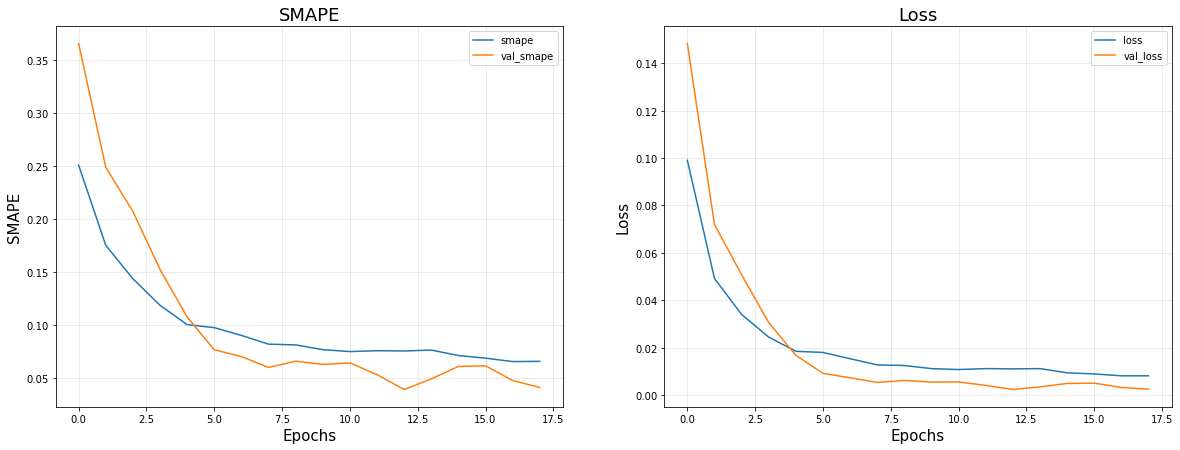

In [18]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)

# Accuracy
plt.plot(history.epoch, history.history['smape'], label = "smape")
plt.plot(history.epoch, history.history['val_smape'], label = "val_smape")

plt.title("SMAPE", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("SMAPE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()


#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

10/10 [==============================] - 0s 7ms/step


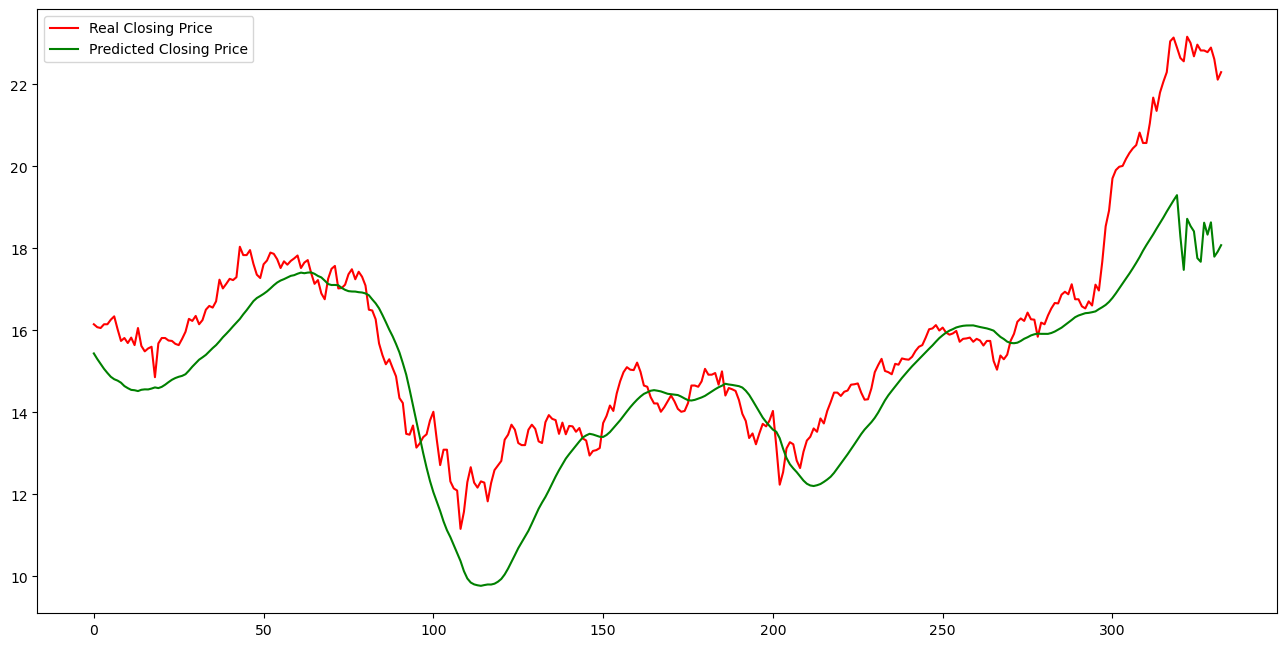

In [19]:
y_pred = regressor.predict(X_test)

# fit the close price back
true = []
for i in range(y_test.shape[0]-1):
  true.append(y_test[i,0])
for i in y_test[-1,:]:
  true.append(i)
true = sc1.inverse_transform(np.asarray(true).reshape(-1, 1))

pred = []
for i in range(y_pred.shape[0]-1):
  pred.append(y_pred[i,0])
for i in y_pred[-1,:]:
  pred.append(i)

pred = sc1.inverse_transform(np.asarray(pred).reshape(-1, 1))

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(true, color='red', label = 'Real Closing Price')
plt.plot(pred, color='green', label = 'Predicted Closing Price')
plt.legend(loc='best')

In [20]:
# new
results = regressor.evaluate(X_test, y_test)
print("test loss, test rmse:", np.round(results, 4))

10/10 [==============================] - 0s 8ms/step - loss: 0.0101 - root_mean_squared_error: 0.1006 - smape: 0.0749
test loss, test rmse: [0.0101 0.1006 0.0749]


In [21]:
def smape_manu(y_true, y_pred):
    if not isinstance(y_true, np.ndarray):
        y_true = np.array(y_true)
    if not isinstance(y_pred, np.ndarray):
        y_pred = np.array(y_pred)
    smape = np.mean(np.abs(y_pred - y_true) /
                    (np.abs(y_true) + np.abs(y_pred))) * 100
    return smape

In [22]:
APE = []
  
# Iterate over the list values
for i in range(y_test.shape[0]):
  for j in range(y_test.shape[1]):
    per_err = (y_test[i,j] - y_pred[i,j]) / y_test[i,j]
  
    # Take absolute value of
    # the percentage error (APE)
    per_err = abs(per_err)
  
    # Append it to the APE list
    APE.append(per_err)
  
# Calculate the MAPE
MAPE = sum(APE)/len(APE)
  
# Print the MAPE value and percentage
print(f'''
MAPE   : { round(MAPE, 2) }
SMAPE   : { round(smape_manu(y_test,y_pred), 2) }
MAPE % : { round(MAPE*100, 2) } %
''')


MAPE   : 0.13
SMAPE   : 6.73
MAPE % : 12.56 %



<a id="4"></a> <br>
## Hyperparameter Tunning

In [23]:

def LSTM_HyperParameter_Tuning(config, x_train, y_train, x_test, y_test):
    
    first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = config
    possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer, third_additional_layer,
                                                  n_neurons, n_batch_size, dropout))
    
    print(possible_combinations)
    print('\n')
    
    hist = []
    
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        regressor = Sequential()
        regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        regressor.add(Dropout(dropout))

        if first_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if second_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if third_additional_layer:
            regressor.add(GRU(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        regressor.add(LSTM(units=n_neurons, return_sequences=False))
        regressor.add(Dropout(dropout))
        regressor.add(Dense(units=14, activation='linear'))
        regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(),smape])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
  

        file_path = 'best_model.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

        regressor.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)

        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0)

        hist.append(list((first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout,
                          train_accuracy, test_accuracy)))

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
         
    return hist

In [24]:
config = [[False], [False], [False], [16, 32], [8, 16, 32], [0.2]]  

# list of lists --> [[first_additional_layer], [second_additional_layer], [third_additional_layer], [n_neurons], [n_batch_size], [dropout]]

hist = LSTM_HyperParameter_Tuning(config, X_train, y_train, X_test, y_test)  # change x_train shape

[(False, False, False, 16, 8, 0.2), (False, False, False, 16, 16, 0.2), (False, False, False, 16, 32, 0.2), (False, False, False, 32, 8, 0.2), (False, False, False, 32, 16, 0.2), (False, False, False, 32, 32, 0.2)]


1th combination: 

--------------------------------------------------------------------

Epoch 1: val_loss improved from inf to 0.02187, saving model to best_model.h5

Epoch 2: val_loss improved from 0.02187 to 0.00499, saving model to best_model.h5

Epoch 3: val_loss improved from 0.00499 to 0.00488, saving model to best_model.h5

Epoch 4: val_loss did not improve from 0.00488

Epoch 5: val_loss did not improve from 0.00488

Epoch 6: val_loss did not improve from 0.00488

Epoch 7: val_loss improved from 0.00488 to 0.00214, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.00214

Epoch 9: val_loss did not improve from 0.00214

Epoch 10: val_loss improved from 0.00214 to 0.00184, saving model to best_model.h5

Epoch 11: val_loss did not improve from 0.

<a id="44"></a> <br>
## Choosing the Best Model

In [25]:
hist = pd.DataFrame(hist)
hist = hist.sort_values(by=7, ascending=True)
hist

,0,1,2,3,4,5,6,7
3,False,False,False,32,8,0.2,"[0.0014666813658550382, 0.038297273218631744, ...","[0.006368480622768402, 0.07980275899171829, 0...."
5,False,False,False,32,32,0.2,"[0.0016444482607766986, 0.040551796555519104, ...","[0.008077970705926418, 0.08987753093242645, 0...."
4,False,False,False,32,16,0.2,"[0.0016998033970594406, 0.04122867062687874, 0...","[0.008775835856795311, 0.09367942810058594, 0...."
2,False,False,False,16,32,0.2,"[0.0018614126602187753, 0.043144091963768005, ...","[0.008891928009688854, 0.09429702162742615, 0...."
0,False,False,False,16,8,0.2,"[0.0019698182586580515, 0.04438262805342674, 0...","[0.009574396535754204, 0.09784884005784988, 0...."
1,False,False,False,16,16,0.2,"[0.0019625902641564608, 0.04430113360285759, 0...","[0.011923467740416527, 0.10919462889432907, 0...."


<a id="5"></a> <br>
## Results

In [26]:
print(f'Best Combination: \n first_additional_layer = {hist.iloc[0, 0]}\n second_additional_layer = {hist.iloc[0, 1]}\n third_additional_layer = {hist.iloc[0, 2]}\n n_neurons = {hist.iloc[0, 3]}\n n_batch_size = {hist.iloc[0, 4]}\n dropout = {hist.iloc[0, 5]}')
print('**************************')
print(f'Results Before Tunning:\n Test Set SMAPE: {np.round(results, 4)[2]}\n')
print(f'Results After Tunning:\n Test Set SMAPE: {np.round(hist.iloc[0, -1], 4)[2]}\n')
print(f'{np.round((results[1] - hist.iloc[0, -1][1])*100/np.round(results, 4)[2])}% Improvement')

Best Combination: 
 first_additional_layer = False
 second_additional_layer = False
 third_additional_layer = False
 n_neurons = 32
 n_batch_size = 8
 dropout = 0.2
**************************
Results Before Tunning:
 Test Set SMAPE: 0.0749

Results After Tunning:
 Test Set SMAPE: 0.058

28.0% Improvement


In [27]:
first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = list(hist.iloc[0, :-2])

In [28]:
regressor = Sequential()
regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(dropout))

if first_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if second_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if third_additional_layer:
    regressor.add(GRU(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

regressor.add(LSTM(units=n_neurons, return_sequences=False))
regressor.add(Dropout(dropout))
regressor.add(Dense(units=14, activation='linear'))
regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(),smape])


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

hist = regressor.fit(X_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)


Epoch 1: val_loss improved from inf to 0.00737, saving model to best_model.h5

Epoch 2: val_loss improved from 0.00737 to 0.00321, saving model to best_model.h5

Epoch 3: val_loss improved from 0.00321 to 0.00181, saving model to best_model.h5

Epoch 4: val_loss did not improve from 0.00181

Epoch 5: val_loss did not improve from 0.00181

Epoch 6: val_loss improved from 0.00181 to 0.00168, saving model to best_model.h5

Epoch 7: val_loss did not improve from 0.00168

Epoch 8: val_loss did not improve from 0.00168

Epoch 9: val_loss did not improve from 0.00168

Epoch 10: val_loss did not improve from 0.00168

Epoch 11: val_loss improved from 0.00168 to 0.00166, saving model to best_model.h5

Epoch 12: val_loss improved from 0.00166 to 0.00160, saving model to best_model.h5

Epoch 13: val_loss did not improve from 0.00160

Epoch 14: val_loss did not improve from 0.00160

Epoch 15: val_loss improved from 0.00160 to 0.00158, saving model to best_model.h5

Epoch 16: val_loss improved from

In [29]:
hist.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'smape', 'val_loss', 'val_root_mean_squared_error', 'val_smape'])

In [30]:
regressor.evaluate(X_test, y_test)

10/10 [==============================] - 0s 8ms/step - loss: 0.0062 - root_mean_squared_error: 0.0789 - smape: 0.0573


[0.006220671813935041, 0.0788712352514267, 0.05726355314254761]

10/10 [==============================] - 0s 7ms/step


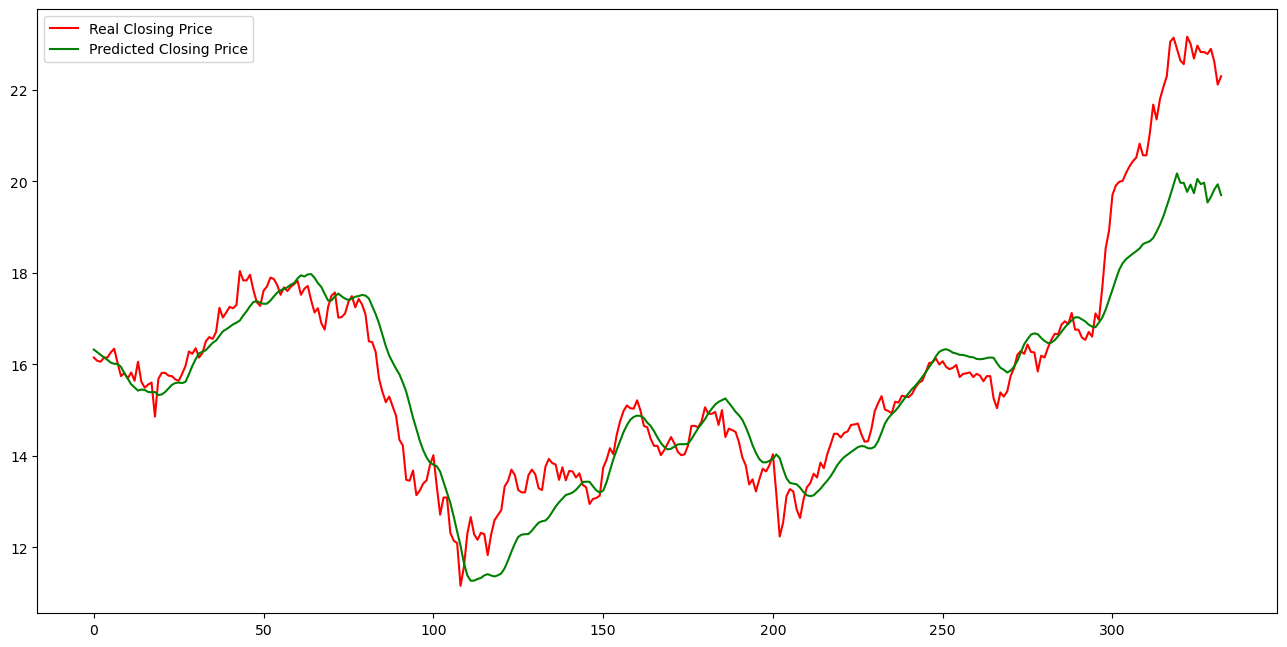

In [31]:
y_pred = regressor.predict(X_test)

# fit the close price back
true = []
for i in range(y_test.shape[0]-1):
  true.append(y_test[i,0])
for i in y_test[-1,:]:
  true.append(i)
true = sc1.inverse_transform(np.asarray(true).reshape(-1, 1))

pred = []
for i in range(y_pred.shape[0]-1):
  pred.append(y_pred[i,0])
for i in y_pred[-1,:]:
  pred.append(i)

pred = sc1.inverse_transform(np.asarray(pred).reshape(-1, 1))

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(true, color='red', label = 'Real Closing Price')
plt.plot(pred, color='green', label = 'Predicted Closing Price')
plt.legend(loc='best')

In [32]:
APE = []
  
# Iterate over the list values
for i in range(y_test.shape[0]):
  for j in range(y_test.shape[1]):
    per_err = (y_test[i,j] - y_pred[i,j]) / y_test[i,j]
  
    # Take absolute value of
    # the percentage error (APE)
    per_err = abs(per_err)
  
    # Append it to the APE list
    APE.append(per_err)
  
# Calculate the MAPE
MAPE = sum(APE)/len(APE)
  
# Print the MAPE value and percentage
print(f'''
MAPE   : { round(MAPE, 2) }
SMAPE  : { round(smape_manu(y_test,y_pred), 2) }
MAPE % : { round(MAPE*100, 2) } %
''')


MAPE   : 0.1
SMAPE  : 5.0
MAPE % : 9.7 %



In [33]:
pred.shape

(333, 1)

In [34]:
# get current directory
import os

folder_path = os.getcwd()

np.save(folder_path + '/'+ file_name + '.npy', pred)